## Prompt:

CONTEXT:
One of the executives wants to know how the pandemic affected furniture.com to plan for similar situations in the future.
The official start date of the pandemic in the United States was January 20, 2020, so, we collected information from October 20, 2019, to April 20, 2020 (see attached csv file).

TODO:
1. Provide insights about possible strategies to improve the business. For this, make data-based calls, meaning, suggestions should be backed by data.
2. Do you see any possible issues with the data sampling strategy? If yes, could you provide some suggestions to fix these problems?
3. Develop a model to predict customer churn and provide recommendations for retention strategies?
4. Send a document back with your analysis. Try to explain your process.

BONUS QUESTION:
After exploring furniture.com, identify 3 KPIs that would make sense to track in Google Analytics. Explain your choices considering how feasible these KPIs are to implement and the business impact.

## Question 1:

When we aggregate and explore the website traffic data we observe that a majority of hits are coming from mobile devices, domestic (within the United States), large, warm climate states within the United States including Florida, Texas, and California, and lastly organic search like Google is the primary way potential customers find Furniture.com

I believe we should continue or start to optimize mobile UI experiences, and make it such that navigating, searching, and purchasing are as easy possible on mobiel devices. Secondily, I think we should invest more into social considering that much our traffic is coming from mobile devices. Thirdly, we should consider what type of furniture large, warm tests like perhaps household furniture rather than small-living furniture. Lastly, the international market doesn't seem to be attracting as much traffic, and might cause the business to be stretched too thin.

Documented work, and pivot charts are shown below to illustrate the importance of social, and large warmer states.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read data
data = pd.read_csv('data_case_study.csv')

Data Pre-Processing including a function to deal with processing

In [58]:
 # convert the year and months into strings to combine as a date
data['dateInt'] = data['year'].astype(str) + data['month'].astype(str).str.zfill(2)
# create a date column for date indices
data['date'] = pd.to_datetime(data['dateInt'], format='%Y%m')

# function to aggregate data
def aggregated_processing(data: pd.DataFrame, filter_selection: str, filters: str):
    """
    data: a pandas dataframe
    filter_selection: a string for a filter
    filters: a string to set filters
    return: aggregated, pandas dataframe with date as the index
    """
    if ((filter_selection or filters) != 'None'):
        data = data[data[filter_selection] == filters]
        
    aggregated = data.groupby(['date']).agg({'NumUsers': 'sum', 'NumNewUsers': 'sum', 'TotalHits': 'sum', 'TotalSessions': 'sum', 'Bounce': 'sum'})
    return(aggregated)


Visualizing the aggregate data to see how it trends over time.

<AxesSubplot:xlabel='date'>

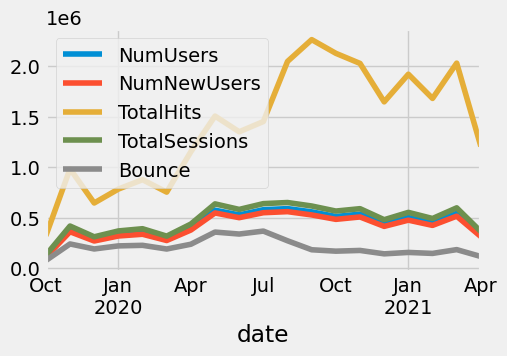

In [59]:
# plot data
# total aggregation
aggregated = aggregated_processing(data = data, filter_selection = 'None', filters = 'None')
aggregated.plot(figsize=(5, 3))

Now, we are looking at the aggregate pivot charts. We see that most of the states are warm, large states in the United States. 

In [60]:
# ranked by region
region= data.groupby(['Region']).agg({'NumUsers': 'sum', 'NumNewUsers': 'sum', 'TotalHits': 'sum', 'TotalSessions': 'sum', 'Bounce': 'sum'})
region_ranked = region.sort_values(by='TotalSessions', ascending=False)
region_ranked.head(10)

,NumUsers,NumNewUsers,TotalHits,TotalSessions,Bounce
Region,,,,,
Florida,894997,843704,2952397,1001328,418461.0
California,778387,744992,2332174,854699,401700.0
Texas,715140,680214,2352223,793766,333962.0
New York,450581,428853,1364646,495456,228759.0
Georgia,390700,368328,1277878,433913,182685.0
Illinois,385728,366999,1243310,422414,187713.0
Pennsylvania,328932,311609,1059524,361424,161100.0
North Carolina,323533,305331,1039654,357320,153744.0
Massachusetts,293491,278277,774279,317891,179584.0


We observe in this pivot chart that most of the webiste visits are coming from the United States, and we should cater to this market more than an international one.

In [61]:
# create a domestic vs international flag
import us
us_states_territories = [str(state) for state in us.states.STATES_AND_TERRITORIES]
us_states_territories.append('District of Columbia')
data['domestic'] = data['Region'].isin(us_states_territories)

# total aggregation
domestic = aggregated_processing(data = data, filter_selection = 'domestic', filters = True)
domestic.head()

,NumUsers,NumNewUsers,TotalHits,TotalSessions,Bounce
date,,,,,
2019-10-01,118037,110178,318840,128291,75248.0
2019-11-01,376157,356919,975245,413038,237862.0
2019-12-01,280738,266263,639267,307329,188512.0
2020-01-01,331891,315434,776584,365157,218669.0
2020-02-01,350100,332350,869293,386826,223776.0


The pivot chart below shows the top sources for users to come to Furniture.com. It's no surprise that many users come from google, which means SEO is still very important to optimize.

In [62]:
source = data.groupby(['SOURCE']).agg({'NumUsers': 'sum', 'NumNewUsers': 'sum', 'TotalHits': 'sum', 'TotalSessions': 'sum', 'Bounce': 'sum'})
source_ranked = source.sort_values(by='TotalSessions', ascending=False)
source_ranked.head(10)

,NumUsers,NumNewUsers,TotalHits,TotalSessions,Bounce
SOURCE,,,,,
google,5529827,5318713,15672393,6047674,3002173.0
(direct),1326518,1284834,4285533,1481260,632698.0
www-furniture-com.cdn.ampproject.org,506654,483687,2712132,562531,110412.0
bing,308842,294948,1379180,342190,73525.0
yahoo,248455,237627,1020126,280071,64516.0
googleads.g.doubleclick.net,75607,1029,394488,85605,18103.0
duckduckgo,69850,67424,264479,79358,20071.0
roomstogo.com,53451,49041,311171,61477,14333.0
doubleclick.net,29029,22,135161,33011,6152.0


It's somewhat surprising to see how many users are coming from mobile, but this means that we should tap into mobile traffic like social.

In [63]:
# ranking of devices
device = data.groupby(['DeviceCategory']).agg({'NumUsers': 'sum', 'NumNewUsers': 'sum', 'TotalHits': 'sum', 'TotalSessions': 'sum', 'Bounce': 'sum'})
device.sort_values(by='TotalSessions', ascending=False)
# a lot of mobile sessions, which means keep mobile UI considerations

,NumUsers,NumNewUsers,TotalHits,TotalSessions,Bounce
DeviceCategory,,,,,
mobile,4988195,4729925,13363852,5479023,3033707.0
desktop,2838549,2704213,11360512,3127502,824278.0
tablet,471085,434987,2060832,534218,131841.0


Lastly, the medium pivot chart shows us how many users are coming from organic or social. Even though we have a lot of traffic coming from organic, we should expect more from social considering that the number one device is mobile.

In [64]:
# ranking of medium
medium = data.groupby(['Medium']).agg({'NumUsers': 'sum', 'NumNewUsers': 'sum', 'TotalHits': 'sum', 'TotalSessions': 'sum', 'Bounce': 'sum'})
medium.sort_values(by='TotalSessions', ascending=False)
# considering how many sessions are coming from mobile I'm surprised our social numbers aren't higher


,NumUsers,NumNewUsers,TotalHits,TotalSessions,Bounce
Medium,,,,,
organic,6065103,5829600,17957826,6645464,3124504.0
(none),1326518,1284834,4285533,1481260,632698.0
referral,805058,656744,4129347,899988,193693.0
cpc,99863,96758,407359,112606,38450.0
affiliate,897,840,3052,987,335.0
social,248,233,1459,271,73.0
email,96,86,313,115,54.0
furniturecom,15,1,231,20,7.0
(not set),12,12,29,13,4.0


## Question 2:

What the major problems with our data sampling is the duration of time. Most of the data we are looking at is during COVID, and if we model with mostly COVID data we might overfit to these types of patterns. Ideally, we should have more data before COVID, and data after COVID to create a smoother more consistent data pattern.

## Question 3:

#### Defining Churn:
To predict customer churn and devise a retention stratedgy we need to create a churn rate metric. Churn is defined as the following: The number of potential customers who are leaving the website. We can calculate churn by taking the difference between the number of users in the time T, and subtract it by T-1. 

We will be predicting churn, which is a nomial value, however, we can calculate the churn and retention rate could gain perspective on the website.

Churn rate is simply the Churn / the number of users from time period T-1. Retention is 1 - the churn rate.

#### Methods:
Now that we have some definitions and metrics defined, we can analyze the model methods and results. The first thing we are going to do is aggregate the data for all regions, sources, and devices. The reason for this is because we want to as large of a sample size per month in each of the features we are going to use to predict churn. In our case, the feautres we are going to use are the number of users, unique number of users, total hits, total sessions, and the bounce.

We are using XGBOOST as our model of choice because it's a fairly straight forward model that doesn't expect linearity. The important thing is to make sure the train test split is not shuffled since it's based on time. We also add standardization to make sure the numerical features are normalized. We set the validation or test size to be 25% of the full data. This is something that should be grid searched and tested because the test size in time series can really change the results.

Based on feature importance we have three features that are the most important in the following order:
1. Number of Users 
2. Bounce
3. Total Hits

We already suspect that the model has data sampling issues, and perhaps not enough features to predict churn well. We can see this in our error metrics where they are very high, but also when we plot the prediced vs actuals the patterns are naive. They don't really fit into any real pattern, and instead show a naive intra-seasonal pattern.

### Recommendation and Conclusion:

What we recommend as a retention stratedgy is to focus on increasing the number of users coming to the website, and limiting the bounce. We can limit the bounce by targeting the right users who would want to shop around Furniture.com, and direct users to the correct place. 

In [65]:
# churn and retention metrics
aggregated['NumUsersMonthDiff'] = aggregated['NumUsers'].diff()
aggregated['Churn'] = aggregated['NumNewUsers'] - aggregated['NumUsersMonthDiff']
aggregated['ChurnRate'] = (aggregated['Churn'] / aggregated['NumUsers'].shift(1))
aggregated['RentionRate'] = 1 - aggregated['ChurnRate']
aggregated.head()

,NumUsers,NumNewUsers,TotalHits,TotalSessions,Bounce,NumUsersMonthDiff,Churn,ChurnRate,RentionRate
date,,,,,,,,,
2019-10-01,119166,111237,321203,129482,75979.0,NaN,NaN,NaN,NaN
2019-11-01,380542,361144,984239,417617,240202.0,261376.0,99768.0,0.837219,0.162781
2019-12-01,284225,269622,645878,310995,190610.0,-96317.0,365939.0,0.961626,0.038374
2020-01-01,335678,319100,783627,369101,221077.0,51453.0,267647.0,0.941673,0.058327
2020-02-01,354153,336269,876708,391079,226603.0,18475.0,317794.0,0.946723,0.053277


In [66]:
# modeling
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

aggregated = aggregated.dropna()

X = aggregated.drop(['NumUsersMonthDiff', 'Churn', 'ChurnRate', 'RentionRate'],1)
y = aggregated['Churn']

# normalize
churn_scaler = MinMaxScaler()
churn_scaler.fit(X)
X=churn_scaler.transform(X)

# train test split, no shuffle since it's based on time
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=False)

# xgboost model
reg = xgb.XGBRegressor(n_estimators=1000)

reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_valid, y_valid)],
        early_stopping_rounds=50,
        verbose=False)

/var/folders/50/g8c3x2r91ld1jq_zpyzwmc1r0000gn/T/ipykernel_60023/3961296124.py:11: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/opt/miniconda3/envs/biomass/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Feature importance plot. We can see that the top three features are the number of users, bounce, and total hits.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

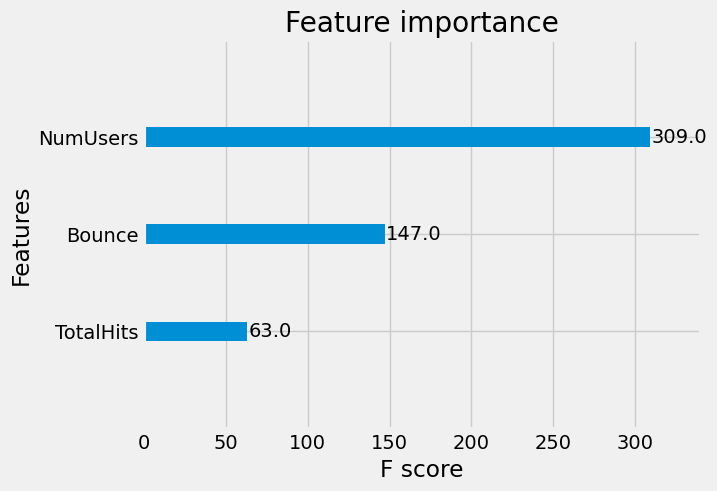

In [67]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
reg.get_booster().feature_names = ['NumUsers','NumNewUsers','TotalHits','TotalSessions', 'Bounce']
xgb.plot_importance(reg)

In [68]:
# fitting validation data on the m odel
y_valid = pd.DataFrame(y_valid.reset_index())
y_valid['Prediction'] = pd.Series(reg.predict(X_valid))

y_train = y_train.reset_index()
all = pd.concat([y_train, y_valid])

import plotly.express as px
px.line(all, x = all.date, y = all.columns)

The errors are very high, but again this is no surprise if we look at the time series plots of the actuals vs the predicted. The predictions are naive, and are not picking up any actual important patterns or trends in the data.

In [69]:
# error calculation
analyze = all.dropna()
mse = mean_squared_error(y_true=analyze['Churn'],
                   y_pred=analyze['Prediction'])
print('MSE: ', mse)
mae = mean_absolute_error(y_true=analyze['Churn'],
                    y_pred=analyze['Prediction'])
print('MAE: ', mae)

MSE:  34906748148.18301
MAE:  170549.40625
